# Sparse Hebbian Learning with Histogram Equalization Homeostasis : testing two different dictionary initalization strategies

1- Dictionary initialized as 2D White Noise

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [3]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico']#, 'rec_error', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 10
#N_scan = 7
tag = 'DICT_INIT'
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, n_iter=2**10+1, record_each=16, 
            homeo_method='HAP', learning_algorithm='mp', verbose=verbose)
shl = SHL(**opts)
data = shl.get_data(matname='data')

Extracting data..loading the data called : data_cache/data_data
Data is of shape : (65520, 324) - done in 0.19s.


## White Noise Initialization + Learning

No cache found data_cache/DICT_INIT_WHITE_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
Iteration   1 /   1025 (elapsed time:   0s,   0mn   0s)
Iteration  17 /   1025 (elapsed time:  12s,   0mn  12s)
Iteration  33 /   1025 (elapsed time:  24s,   0mn  24s)
Iteration  49 /   1025 (elapsed time:  36s,   0mn  36s)
Iteration  65 /   1025 (elapsed time:  48s,   0mn  48s)
Iteration  81 /   1025 (elapsed time:  60s,   1mn   0s)
Iteration  97 /   1025 (elapsed time:  72s,   1mn  12s)
Iteration  113 /   1025 (elapsed time:  85s,   1mn  25s)
Iteration  129 /   1025 (elapsed time:  97s,   1mn  37s)
Iteration  145 /   1025 (elapsed time:  109s,   1mn  49s)
Iteration  161 /   1025 (elapsed time:  121s,   2mn   1s)
Iteration  177 /   1025 (elapsed time:  133s,   2mn  13s)
Iteration  193 /   1025 (elapsed time:  145s,   2mn  25s)
Iteration  209 /   1025 (elapsed time:  157s,   2mn  37s)
Iteration  225 /   1025 (elapsed time:  170s,   2mn  50s)
Iteration  241 /   1025 (el

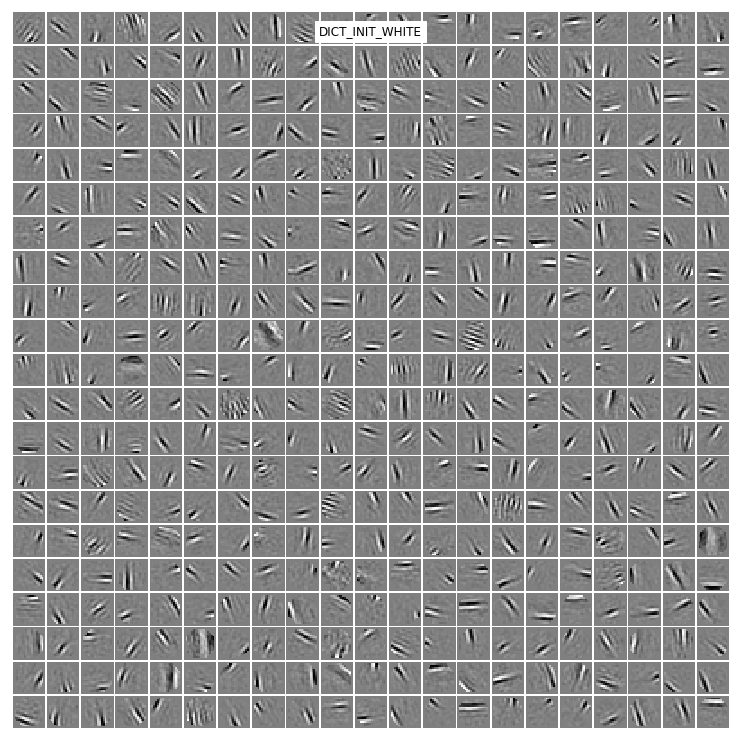

In [4]:
matname = tag + '_WHITE'
shl = SHL(one_over_F=False, **opts)
dico_w = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

## 1/f Noise Initialization + Learning

No cache found data_cache/DICT_INIT_OVF_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
Iteration   1 /   1025 (elapsed time:   1s,   0mn   1s)
Iteration  17 /   1025 (elapsed time:  13s,   0mn  13s)
Iteration  33 /   1025 (elapsed time:  26s,   0mn  26s)
Iteration  49 /   1025 (elapsed time:  38s,   0mn  38s)
Iteration  65 /   1025 (elapsed time:  50s,   0mn  50s)
Iteration  81 /   1025 (elapsed time:  62s,   1mn   2s)
Iteration  97 /   1025 (elapsed time:  74s,   1mn  14s)
Iteration  113 /   1025 (elapsed time:  87s,   1mn  27s)
Iteration  129 /   1025 (elapsed time:  99s,   1mn  39s)
Iteration  145 /   1025 (elapsed time:  111s,   1mn  51s)
Iteration  161 /   1025 (elapsed time:  124s,   2mn   4s)
Iteration  177 /   1025 (elapsed time:  136s,   2mn  16s)
Iteration  193 /   1025 (elapsed time:  148s,   2mn  28s)
Iteration  209 /   1025 (elapsed time:  160s,   2mn  40s)
Iteration  225 /   1025 (elapsed time:  173s,   2mn  53s)
Iteration  241 /   1025 (elap

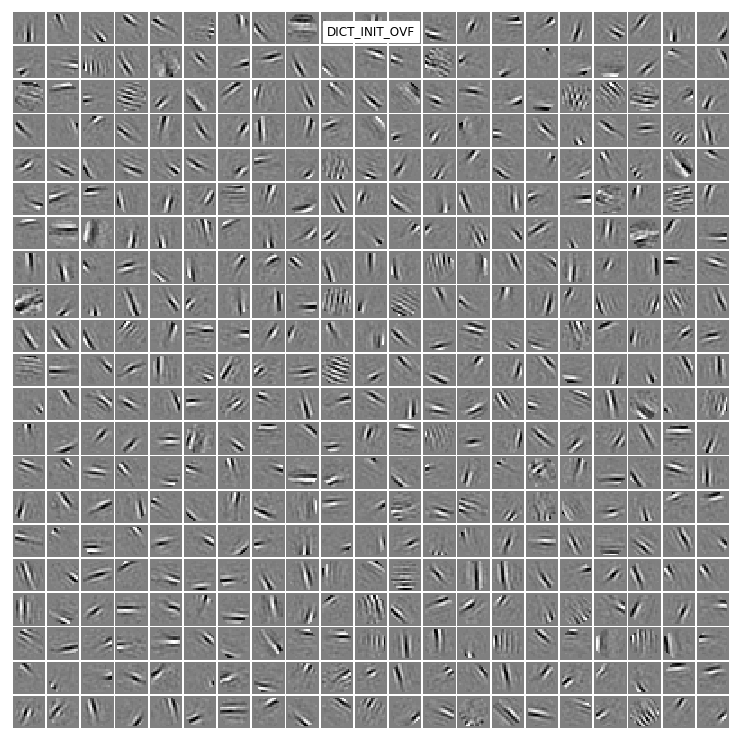

In [5]:
matname = tag + '_OVF'
shl = SHL(one_over_F=True, **opts)
dico_1oF = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

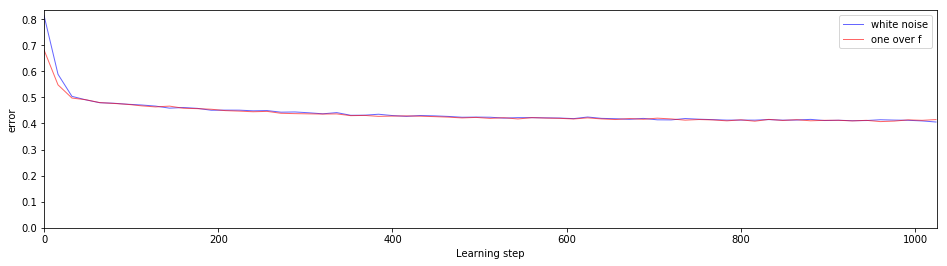

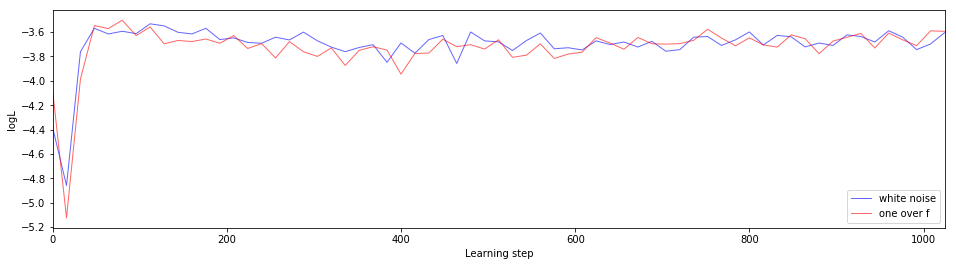

In [6]:
for variable in ['error', 'logL']:
    fig_error, ax_error = None, None
    fig_error, ax_error = shl.time_plot(dico_w, variable=variable, fig=fig_error, ax=ax_error, color='blue', label='white noise')
    fig_error, ax_error = shl.time_plot(dico_1oF, variable=variable, fig=fig_error, ax=ax_error, color='red', label='one over f')
    #ax_error.set_ylim((0, .65))
    ax_error.legend(loc='best')
    plt.show();

## Version used

In [7]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.3.1
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.2
shl_scripts 20171221
pandas 0.22.0
Fri Apr 27 17:08:34 2018 CEST